# 📈 Análisis Total de Desempleo - Región de Los Ríos

Este notebook presenta la evolución temporal del total de personas desempleadas en la Región de Los Ríos, utilizando datos oficiales de la Encuesta Nacional de Empleo (ENE) del INE.


## 📈 Evolución del Desempleo Total

En este bloque se realiza la carga, procesamiento y visualización de la serie temporal del desempleo total en la Región de Los Ríos.

- **Carga de datos:** Se importa el dataset consolidado de desocupación.
- **Conversión de fechas:** Se asegura que la columna `periodo` esté en formato datetime para un análisis temporal correcto.
- **Agregación:** Se agrupan los datos por fecha, sumando el total de personas desocupadas en cada periodo.
- **Visualización:** Se genera un gráfico de líneas que muestra la evolución del desempleo total entre 2010 y 2025.


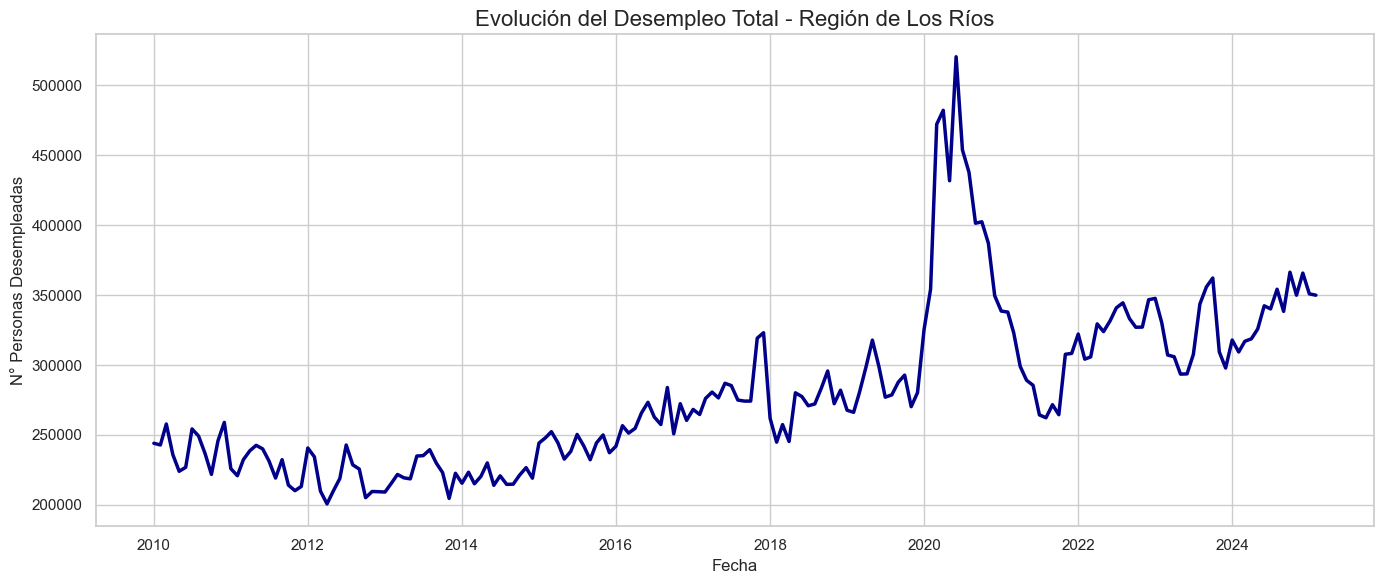

In [8]:
# 03_eda_desempleo_total.ipynb

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar visualización
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (14, 6)

# Cargar datos
df = pd.read_csv("../data/processed/poblacion_desocupada_combinado.csv")

# Asegurar formato correcto de fecha
df["periodo"] = pd.to_datetime(df["periodo"].astype(str).str[:10])

# Agrupar por fecha y sumar valores para obtener total general
df_total = df.groupby("periodo")["valor"].sum().reset_index()
df_total.rename(columns={"valor": "Desempleo Total"}, inplace=True)

# Visualizar
plt.figure()
sns.lineplot(data=df_total, x="periodo", y="Desempleo Total", color="darkblue", linewidth=2.5)
plt.title("Evolución del Desempleo Total - Región de Los Ríos", fontsize=16)
plt.xlabel("Fecha")
plt.ylabel("N° Personas Desempleadas")
plt.tight_layout()
plt.show()